# EDA Example + Multilinear Regression model


## Importing the relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('./data/cars.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

In [3]:
raw_data.shape # Shows how many rows and columns in you dataset

(4345, 9)

### Exploratory Data Analysis (EDA)

In [4]:
# We need to "evaluate" our variables - data is often not clean (not ready for modeling)
# The Pandas .drescribe() Method is a good starting point 

In [5]:
# By default, you'll only get stats about numerical values
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [6]:
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

# Notice how categorical variables show different metrics than numerical variables 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [7]:
# As you can see above the Model column we has 312 unique values
# (side note: we could dummy our Model column, but that would generate 300+ columns and cause out model to be overfit)
# We have not use for this column, so we're going to drop it.
data = raw_data.drop(['Model'],axis=1)

# Let's check the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [8]:
# data.isnull() return a dataframe with boolian values: True for missing values and False for Non-missing values
# In Python True == 1 and False == 0, so we can sum all our null togeter,
True == 1 , False == 0

(True, True)

In [9]:
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is acceptable
data.dropna(axis=0, inplace=True)

In [11]:
# .isna() is the same as .isnull() 
# Bellow we can varifying that we droped the null values
data.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [12]:
# Let's check if anything's changed after removing null values
data.describe(include='all')
# It looks like we lost about 300 rows of data. Less than 5%, so we're ok

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

Categorical variable
Categorical variable
Categorical variable
Categorical variable


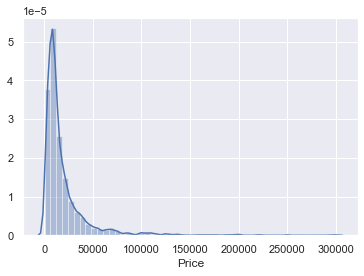

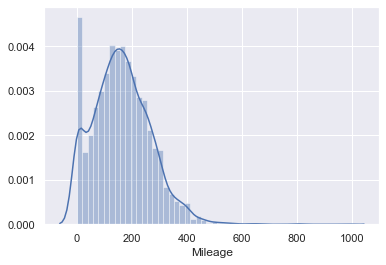

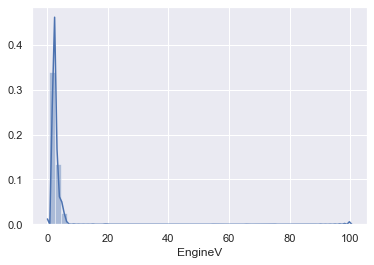

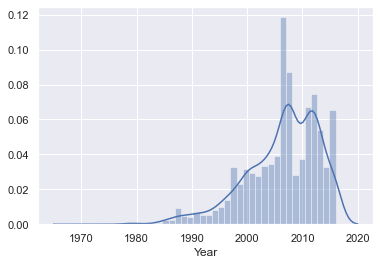

<Figure size 432x288 with 0 Axes>

In [13]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
for i in list(data.columns):
    try:
        sns.distplot(data[i]);
        plt.figure()
    except:
        print("Categorical variable")

### Dealing with outliers

In [14]:
# Obviously there are some outliers present 

# For this example we have used cars that cost as much as 300,000, which will certainly skew our predictions
# One solution is to take out the extreme data points, so that we are not predicting based on anomolies

# Let's take every data point bellow the 99 percentile
data_1 = data[data['Price']< data['Price'].quantile(0.99)]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1 = data_1[data_1['Mileage']<data_1['Mileage'].quantile(0.995)] # Milage is skewed also
data_1 = data_1[data_1['EngineV']<6.5] # Lamborghinis have 6.5 liter engines,so let's get rid of anything above that extreme. 
data_1 = data_1[data_1['Year']>data_1['Year'].quantile(0.01)] # let's get rid of any super old cars, since it's extreme
df = data_1.reset_index(drop=True) # Need to reset the index when you drop columns
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3885,3885.000000,3885,3885.000000,3885.000000,3885,3885,3885.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1476,NaN,NaN,1819,3520,NaN
mean,NaN,18132.885485,NaN,161.901416,2.450386,NaN,NaN,2006.659202
std,NaN,19063.423345,NaN,97.471218,0.948922,NaN,NaN,6.143093
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,228.000000,3.000000,NaN,NaN,2012.000000


Categorical variable
Categorical variable
Categorical variable
Categorical variable


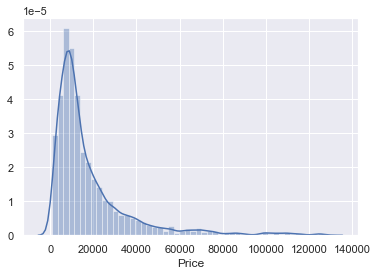

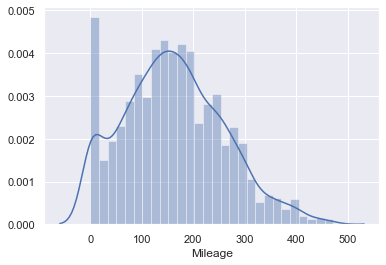

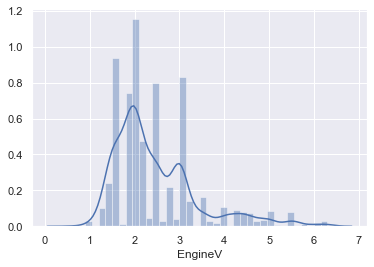

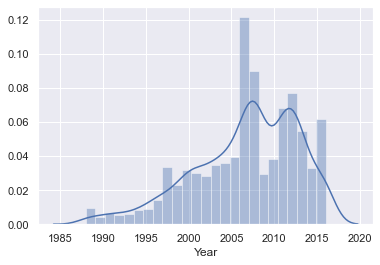

<Figure size 432x288 with 0 Axes>

In [15]:
for i in list(df.columns):
    try:
        sns.distplot(df[i]);
        plt.figure()
    except:
        print("Categorical variable")

In [16]:
# Let's see what's left
df.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3885,3885.000000,3885,3885.000000,3885.000000,3885,3885,3885.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1476,NaN,NaN,1819,3520,NaN
mean,NaN,18132.885485,NaN,161.901416,2.450386,NaN,NaN,2006.659202
std,NaN,19063.423345,NaN,97.471218,0.948922,NaN,NaN,6.143093
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,228.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

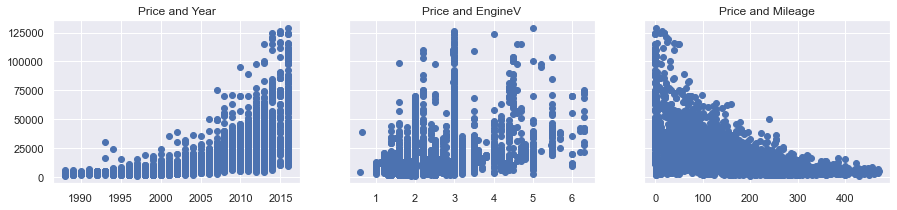

In [17]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(df['Year'],df['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df['EngineV'],df['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(df['Mileage'],df['Price'])
ax3.set_title('Price and Mileage')



plt.show()

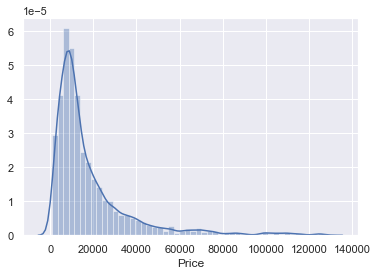

In [18]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(df['Price'])

### Relaxing the assumptions

In [19]:
# Let's transform 'Price' with a log transformation
log_price = np.log(df['Price'])

# Then we add it to our data frame
df['log_price'] = log_price
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3880,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3881,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3882,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3883,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


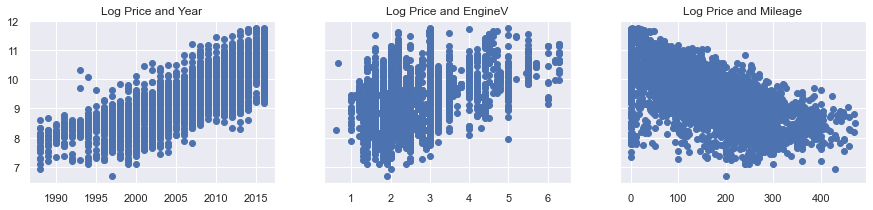

In [20]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df['Year'],df['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(df['EngineV'],df['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(df['Mileage'],df['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [21]:
# Since we will be using the log price variable, we can drop the old 'Price' one
df.drop(['Price'],axis=1, inplace=True)

### Multicollinearity

In [22]:
# Let's quickly see the columns of our data frame
df.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [23]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = df[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [24]:
# Let's explore the result
vif

,VIF,Features
0,3.732793,Mileage
1,10.305016,Year
2,7.668037,EngineV


In [25]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = df.drop(['Year'],axis=1)

## Create dummy variables

In [26]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [27]:
# Here's the result
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Rearrange a bit

In [28]:
# To make our data frame more organized, we prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# We can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [29]:
# To make the code a bit more parametrized, let's declare a new variable that will contain the preferred order
# If you want a different order, just specify it here
# Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [30]:
# To implement the reordering, we will create a new df, which is equal to the old one but with the new order of features
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

### Declare the inputs and the targets

In [31]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [32]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
inputs_scaled = scaler.fit_transform(inputs)

### Train Test Split

In [33]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.25, random_state=42)

### Create the regression

In [34]:
# Create a linear regression object
lr = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
preds = lr.predict(x_train)

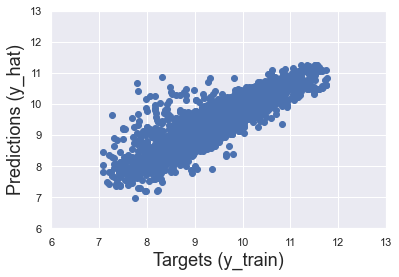

In [36]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, preds)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

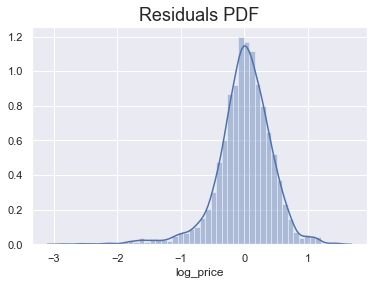

In [37]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - preds)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [38]:
# Find the R-squared of the model
lr.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.7471431939351507

### Finding the weights and bias

In [39]:
# Obtain the bias (intercept) of the regression
lr.intercept_, np.exp(lr.intercept_)

(9.41842737307902, 12313.202911122253)

In [40]:
# Obtain the weights (coefficients) of the regression
lr.coef_

# Note that they are barely interpretable if at all

array([-0.45768862,  0.21688765,  0.01471143,  0.01051356, -0.13565965,
       -0.17809403, -0.05006556, -0.07664301, -0.14209993, -0.09070128,
       -0.19322744, -0.1230984 , -0.15592984, -0.11982579, -0.02708384,
       -0.15039503,  0.31162398])

In [41]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = lr.coef_
reg_summary

,Features,Weights
0,Mileage,-0.457689
1,EngineV,0.216888
2,Brand_BMW,0.014711
3,Brand_Mercedes-Benz,0.010514
4,Brand_Mitsubishi,-0.135660
5,Brand_Renault,-0.178094
6,Brand_Toyota,-0.050066
7,Brand_Volkswagen,-0.076643
8,Body_hatch,-0.142100
9,Body_other,-0.090701


In [42]:
# Check the different categories in the 'Brand' variable
df['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [43]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = lr.predict(x_test)

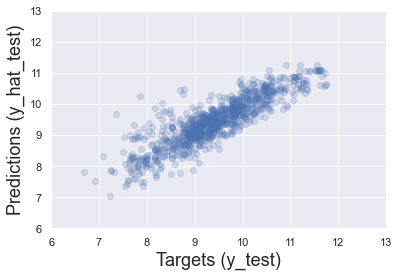

In [44]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [45]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,4270.644680
1,12359.876015
2,13969.261575
3,12673.109993
4,11102.089182


In [46]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,4270.644680,4200.0
1,12359.876015,NaN
2,13969.261575,NaN
3,12673.109993,NaN
4,11102.089182,NaN
...,...,...
967,7517.415044,NaN
968,10622.019544,NaN
969,9669.262949,38700.0
970,4623.474005,NaN


In [47]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    8.665613
1    8.517193
2    9.230143
3    9.210340
4    9.059517
Name: log_price, dtype: float64

In [48]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,4270.644680,5800.0
1,12359.876015,5000.0
2,13969.261575,10200.0
3,12673.109993,10000.0
4,11102.089182,8600.0
...,...,...
967,7517.415044,7500.0
968,10622.019544,8800.0
969,9669.262949,9300.0
970,4623.474005,3850.0


In [49]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [50]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,4270.644680,5800.0,1529.355320,26.368195
1,12359.876015,5000.0,-7359.876015,147.197520
2,13969.261575,10200.0,-3769.261575,36.953545
3,12673.109993,10000.0,-2673.109993,26.731100
4,11102.089182,8600.0,-2502.089182,29.094060
...,...,...,...,...
967,7517.415044,7500.0,-17.415044,0.232201
968,10622.019544,8800.0,-1822.019544,20.704768
969,9669.262949,9300.0,-369.262949,3.970569
970,4623.474005,3850.0,-773.474005,20.090234


In [51]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,972.000000,972.000000,972.000000,972.000000
mean,16574.215062,18412.469270,1838.254208,38.649863
std,13062.610188,19907.495858,11174.745270,66.823815
min,1147.145522,800.000000,-29322.891168,0.011732
25%,7892.089312,7200.000000,-2588.094184,11.616674
50%,12419.591944,11750.000000,-111.579820,23.769686
75%,20339.344814,21625.000000,2840.994525,42.067941
max,77999.845106,125000.000000,84990.474034,989.820612


In [52]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 991

# Moreover, to make the dataset readable, we'll display only the first 2 digits after the decimal point  
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
843,33903.98,33900.00,-3.98,0.01
43,21815.27,21800.00,-15.27,0.07
752,11718.00,11700.00,-18.00,0.15
967,7517.42,7500.00,-17.42,0.23
489,33897.85,34000.00,102.15,0.30
216,18740.41,18800.00,59.59,0.32
851,30597.35,30500.00,-97.35,0.32
884,15747.73,15800.00,52.27,0.33
221,2890.30,2900.00,9.70,0.33
727,5276.68,5300.00,23.32,0.44


In [53]:
# Let's import the pickle library 
import pickle

# Bellow we're going to create and write into a file.
with open('pickled_model.pkl', 'wb') as pickle_file:
    pickle.dump(lr, pickle_file) # Pickle.dump() to dump the obj into the file

In [54]:
# Time to test if our pickl worked
# Bellow we're assigning the LinearRegression to the variable model
with open('pickled_model.pkl', 'rb') as pickle_file:
    model = pickle.load(pickle_file)

In [55]:
# As you can see we can still use the regression object as normal, including making predictions
model.predict(x_train)

array([10.31024826,  9.04305541,  8.77701126, ...,  9.68813504,
        8.87740167, 10.28406215])

In [56]:

model.coef_

array([-0.45768862,  0.21688765,  0.01471143,  0.01051356, -0.13565965,
       -0.17809403, -0.05006556, -0.07664301, -0.14209993, -0.09070128,
       -0.19322744, -0.1230984 , -0.15592984, -0.11982579, -0.02708384,
       -0.15039503,  0.31162398])